# Indice
- [Media por Iteração](#Media-por-Iteração)
- [Media por Execução](#Media-por-Execução)
- [Media Execuções](#Media-Execuções)
- [Comparação](#Comparação)


In [95]:
import random
import matplotlib.pyplot as plt
from statistics import stdev

def erroAbsoluto(exato, aproximado):
    return abs(exato-aproximado)
def erroRelativo(exato, aproximado):
    if(aproximado == 0): return 0
    return erroAbsoluto(exato, aproximado)/aproximado

In [44]:
def eval(x):
    y = [0 for x in range(3)]
    y[0] = (3 * x[0]) + (2* x[1]) + (4* x[2])
    y[1] = (x[0]) + x[1] + (2* x[2])
    y[2] = (4* x[0]) + (3* x[1] - 2* x[2])
    
    return y

def relativeError(results, expected):
    error = [0 for x in range(3)]
    for i in range(3):
        error[i] = erroRelativo(results[i], expected[i])
    return error


def randomGenerator():
    numbers = []
    for i in range(3):
        numbers.append(round(random.uniform(-10, 10), 5))
        
    return numbers

def sum(arr):
    soma = 0
    for i in arr:
        soma+= i
        
    return soma
        

    
    
def mean(arr):
    if (len(arr) > 0):
        return sum(arr)/len(arr)
    return 0

        
    
    

In [87]:
class sequence():
    
    numbers = []
    result = [0 for x in range(3)]    
    error = [0 for x in range(3)]
    meanError = 0
    def evalS(self):
        x = self.numbers
        self.result[0] = (3 * x[0]) + (2* x[1]) + (4* x[2])
        self.result[1] = (x[0]) + x[1] + (2* x[2])
        self.result[2] = (4* x[0]) + (3* x[1] - 2* x[2])
        return self.result
    
    def rerror(self, results, expected):
        for i in range(3):
            self.error[i] = erroRelativo(results[i], expected[i])
        return self.error
        
    def meanError(self):
        self.meanError = mean(self.error)
        return self.meanError
        
        
    def __init__(self, numbers):
        self.numbers = numbers
        self.evalS()
        self.rerror(self.result, [1, 2, 3])
        self.meanError()
        
teste = sequence([2.321, 0.312, 5.231])

#print(teste.numbers)



def arrMean(arr):
    acc = 0
    if(len(arr) > 0):
        for i in (arr):
            acc += i.meanError
        
        return acc/len(arr)
        
    

In [178]:
bestForIteration = [[] for x in range(5)]
def execution(number):
    sequences = [sequence(randomGenerator()) for x in range(50)]

    sequences.sort(key=lambda x: x.meanError, reverse=False)

    sequences = sequences[:25]

    #print(arrMean(sequences))
    for i in range(1000):
        
        bestForIteration[number].append(sequences[0].meanError)
        
        for i in range(25):
            sequences.append(sequence(randomGenerator()))

        if(arrMean(sequences) < 2):
            break
        else:
            sequences.sort(key=lambda x: x.meanError, reverse=False)

            sequences = sequences[:25]


    #for i in sequences:
        #print("a: ", end = '')
        #print(i.meanError * 100)
        
    return sequences[0]

    

In [179]:
best = []
for i in range(5):
    best.append(execution(i))
print("oi")
bestSequences = []
for seq in best:
    bestSequences.append(seq.meanError * 100)

meanBruteForce = mean(bestSequences) 
devBruteForce = stdev(bestSequences)




oi


In [180]:
def mediaIt(arr):
    tmp = 0
    newArr = []
    for i in range(1000):
        for j in range(5):
         tmp += arr[j][i]
        newArr.append(tmp)
        tmp = 0
    return newArr

## Media por Iteração

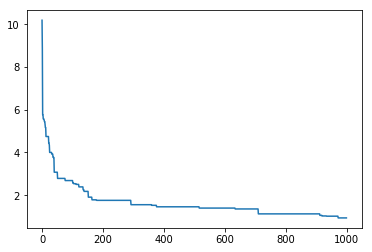

In [181]:
mediaGeral = mediaIt(bestForIteration)
x_arr = [x for x in range(1000)]
plt.plot(x_arr, mediaGeral)
plt.show()

## Media por Execução

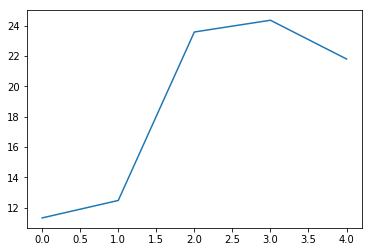

In [182]:
x_axis = [x for x in range(5)]
plt.plot(x_axis, bestSequences)
plt.show()

## Media Execuções

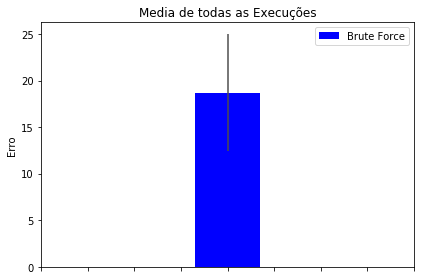

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 1

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index, meanBruteForce, bar_width,
                color='b',
                yerr=devBruteForce, error_kw=error_config,
                label='Brute Force')

ax.set_xlim(-1, 1)
ax.set_ylabel('Erro')
ax.set_title('Media de todas as Execuções')
ax.set_xticklabels((''))
ax.legend()

fig.tight_layout()
plt.show()

## Comparação

In [156]:
for i in best:
    print(i.numbers, end = '||')
    print([-3, 5, 0])

[-4.00202, 6.69202, -0.11129]||[-3, 5, 0]
[-3.64299, 6.16741, -0.10248]||[-3, 5, 0]
[-3.02458, 4.71513, 0.14868]||[-3, 5, 0]
[-3.6137, 5.64117, 0.01627]||[-3, 5, 0]
[-0.83123, 2.14715, -0.1753]||[-3, 5, 0]
